# Importing Libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Reading Data

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Extracting the Time Series

In [3]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

We see that the dataset contains data for three product category, namely Furniture, Office supplies and technology. Lets first try to forecast sales of furnitures.

In [4]:
df.shape

(9994, 21)

In [5]:
furniture=df[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [7]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [10]:
furniture.drop(cols, axis=1, inplace=True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [11]:
furniture = furniture.sort_values('Order Date')
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [13]:
furniture.shape

(2121, 2)

# Data Cleaning

In [14]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [15]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [16]:
furniture.shape

(889, 2)

## Setting date as index

In [17]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

## Resampling

Since our order dates are daily, we will resample it to monthly to somewhat smoothen it out

In [18]:
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Plotting the time series

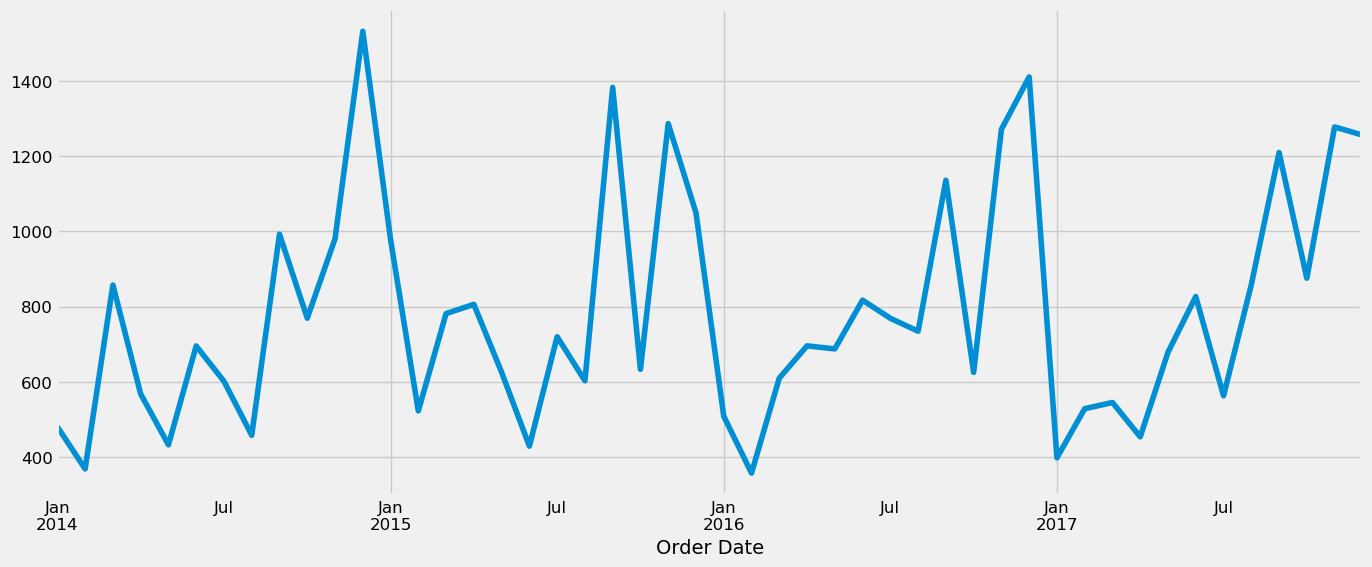

In [19]:
y.plot(figsize=(15, 6))
plt.show()

Observations:

1. The time-series has seasonality pattern, sales are low at the beginning of the year and high at the end of the year. 
2. There is an upward trend within any single year with low months in the mid of the year.

## Stationarity Check

We will try the following to ensure stationarity of the series:

1. Time series decomposition
2. ADF test

### Time series decomposition

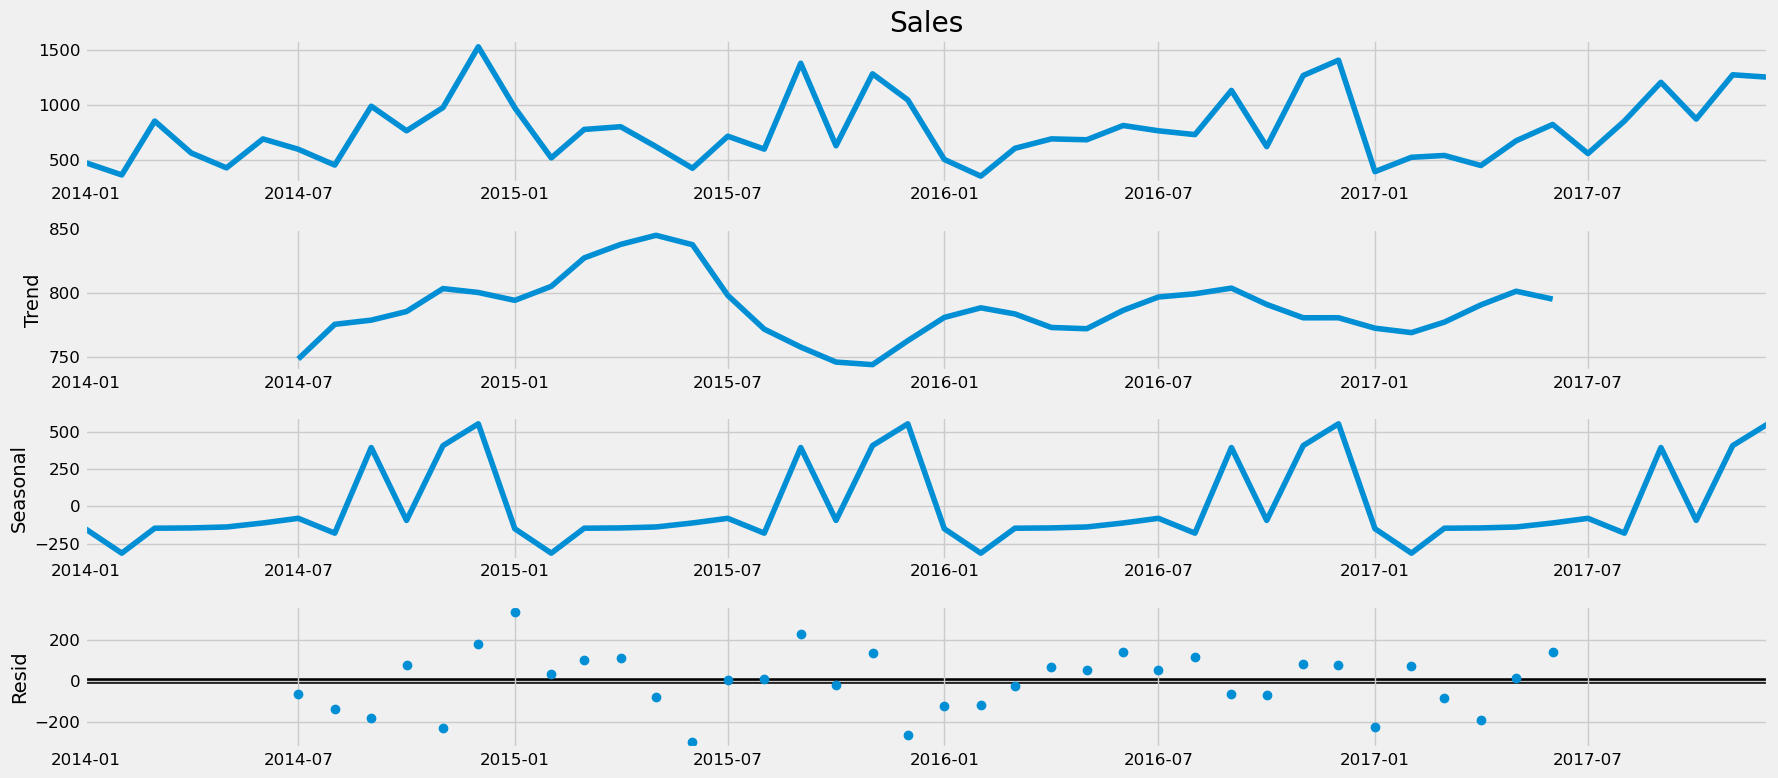

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### ADF Test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def test_adfuller(data):
    res=adfuller(data,maxlag=16)
    labels=['ADF Test Statistic','p-value','#Lags Used','No. of obs. used']
    for label, value in zip(labels,res):
        print(label+':'+str(value))
    if res[1]<=0.05:
        print('H0 is rejected, series is stationary')
    else:
        print('Failed to reject H0, series is not stationary')

In [33]:
test_adfuller(y)

ADF Test Statistic:-2.43995176848655
p-value:0.1307762660460257
#Lags Used:11
No. of obs. used:36
Failed to reject H0, series is not stationary


**Observation:**
    
1. **From visual inspection of the time series decomposition, there seems to be a clear yearly trend coupled with a 12 months seasonality.**
2. **This is further validated by the augmented dicky fuller test using 11 lags.**

## Trying Differencing

Lets see if differencing the series could make the series stationary

In [26]:
ydf=pd.DataFrame(y)
ydf.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [27]:
ydf['First difference']=ydf['Sales']-ydf['Sales'].shift(1)
ydf['First seasonal difference']=ydf['Sales']-ydf['Sales'].shift(12)

In [29]:
ydf.head()

,Sales,First difference,First seasonal difference
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,-112.262631,NaN
2014-03-01,857.291529,489.359929,NaN
2014-04-01,567.488357,-289.803172,NaN
2014-05-01,432.049188,-135.439170,NaN


In [30]:
test_adfuller(ydf['First difference'].dropna())

ADF Test Statistic:-2.3685982650221433
p-value:0.15079613103076706
#Lags Used:13
No. of obs. used:33
Failed to reject H0, series is not stationary


In [34]:
test_adfuller(ydf['First seasonal difference'].dropna())

ADF Test Statistic:-2.965092915792982
p-value:0.038285386899476845
#Lags Used:16
No. of obs. used:19
H0 is rejected, series is stationary


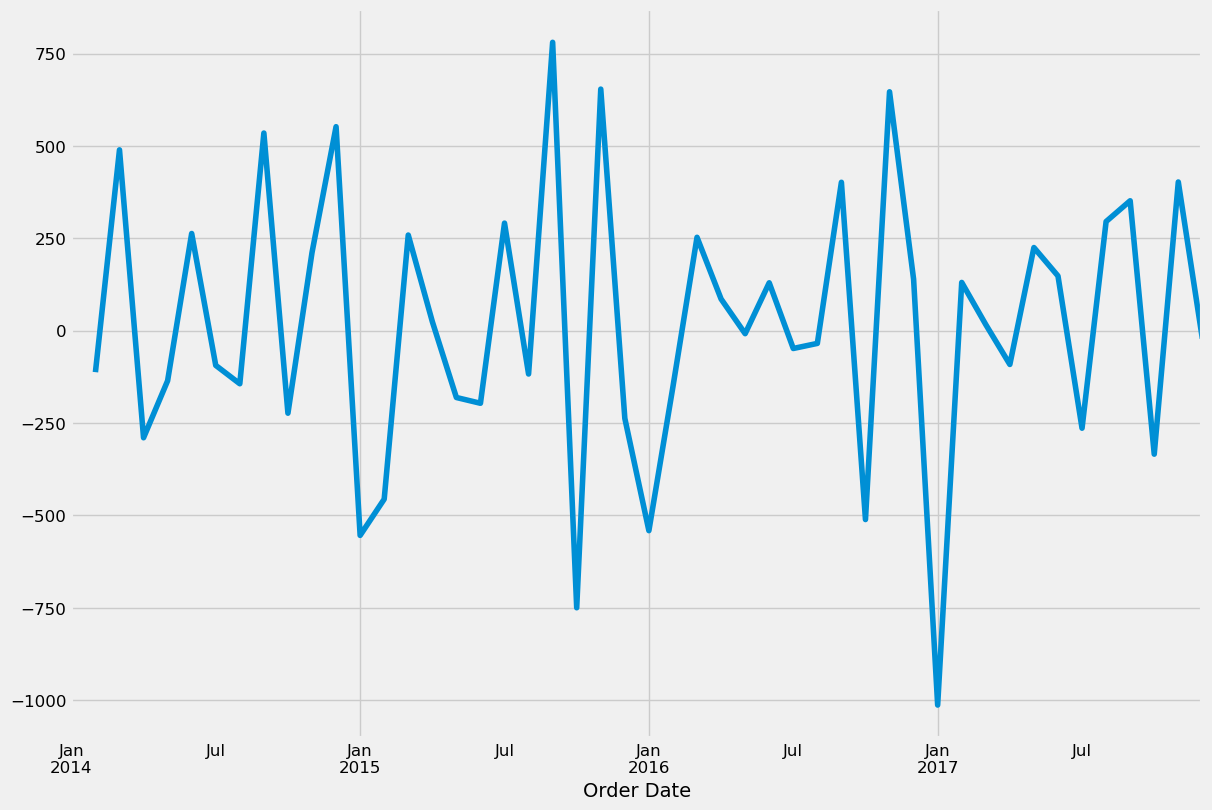

In [36]:
rcParams['figure.figsize'] = 18, 8
ydf['First difference'].plot(figsize=(13,9));

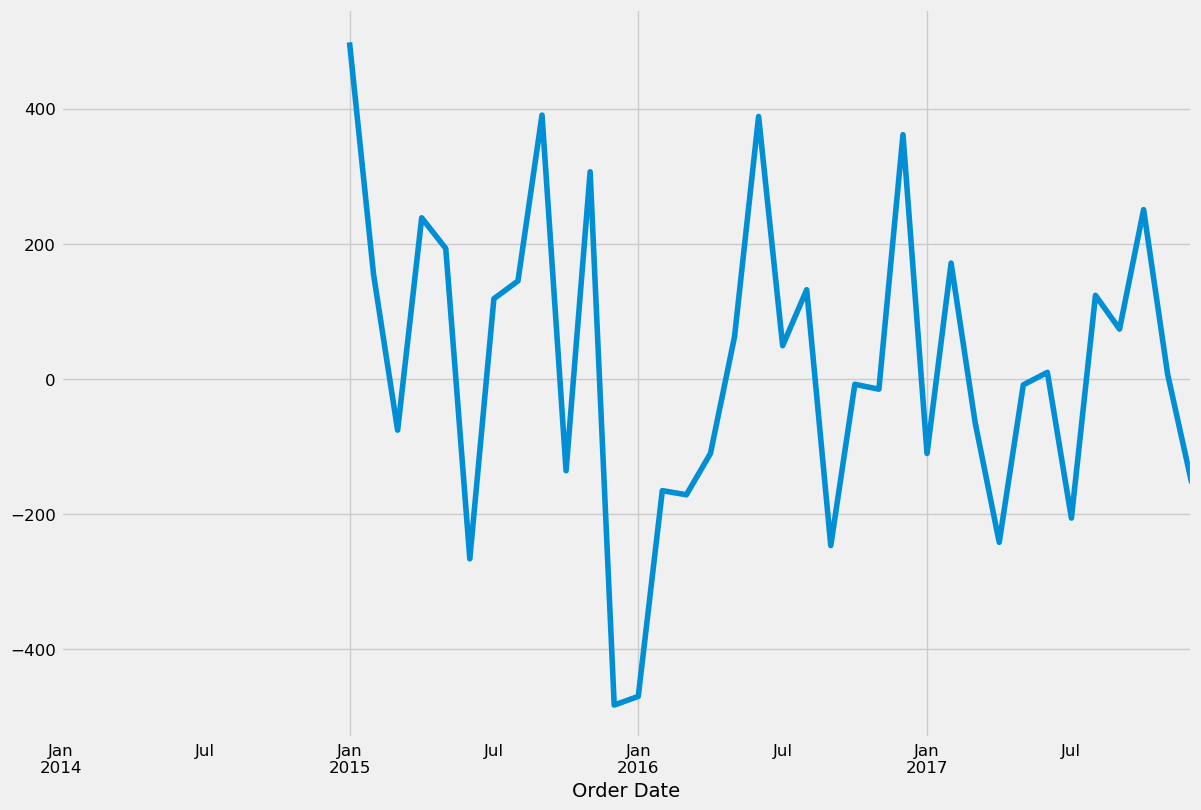

In [37]:
rcParams['figure.figsize'] = 18, 8
ydf['First seasonal difference'].plot(figsize=(13,9));

OBSERVATIONS:
    
- Seasonal differencing with 12 months period once removes the seasonality.

## ACF and PACF plots

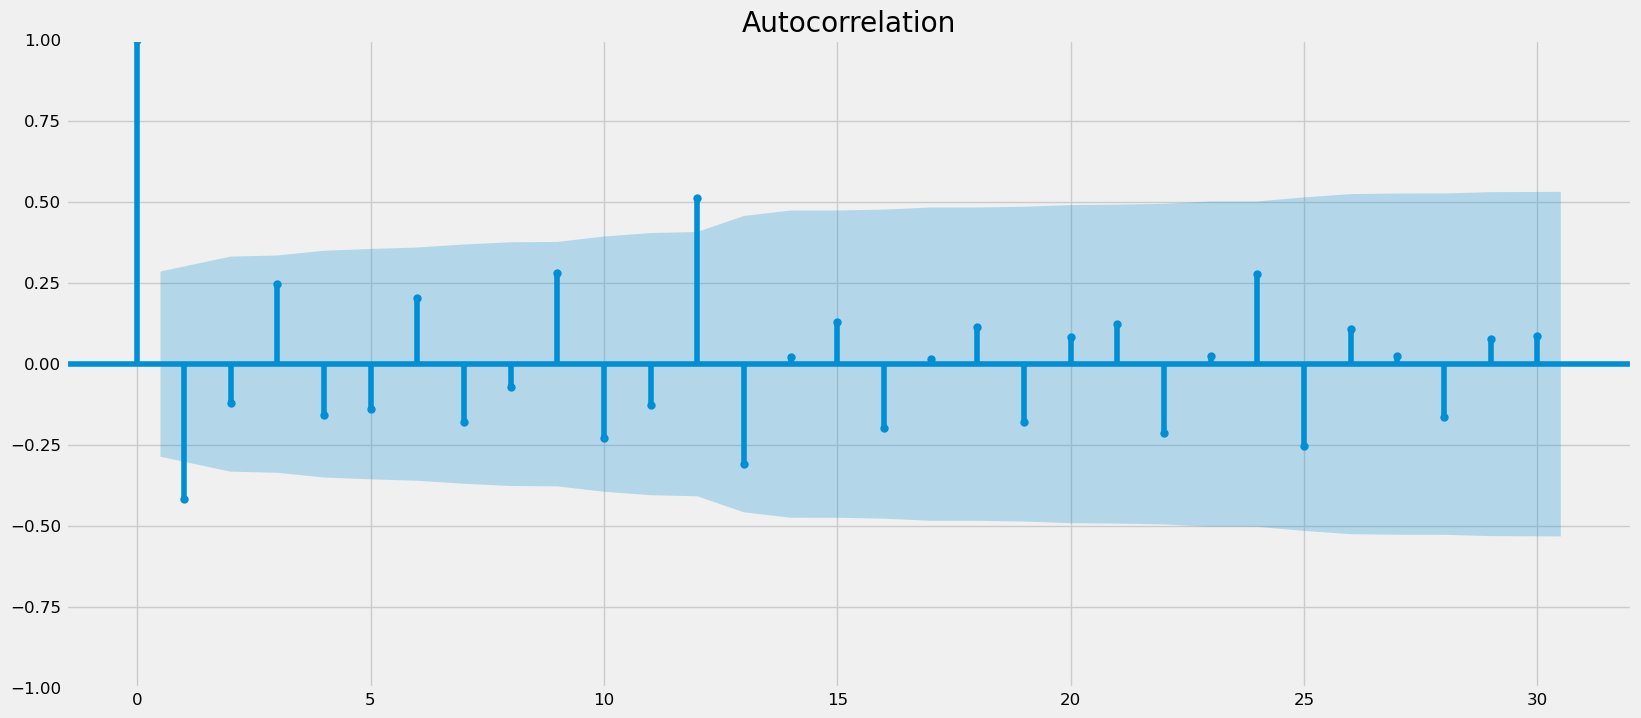

In [38]:
sm.graphics.tsa.plot_acf(ydf['First difference'].iloc[1:],lags=30);

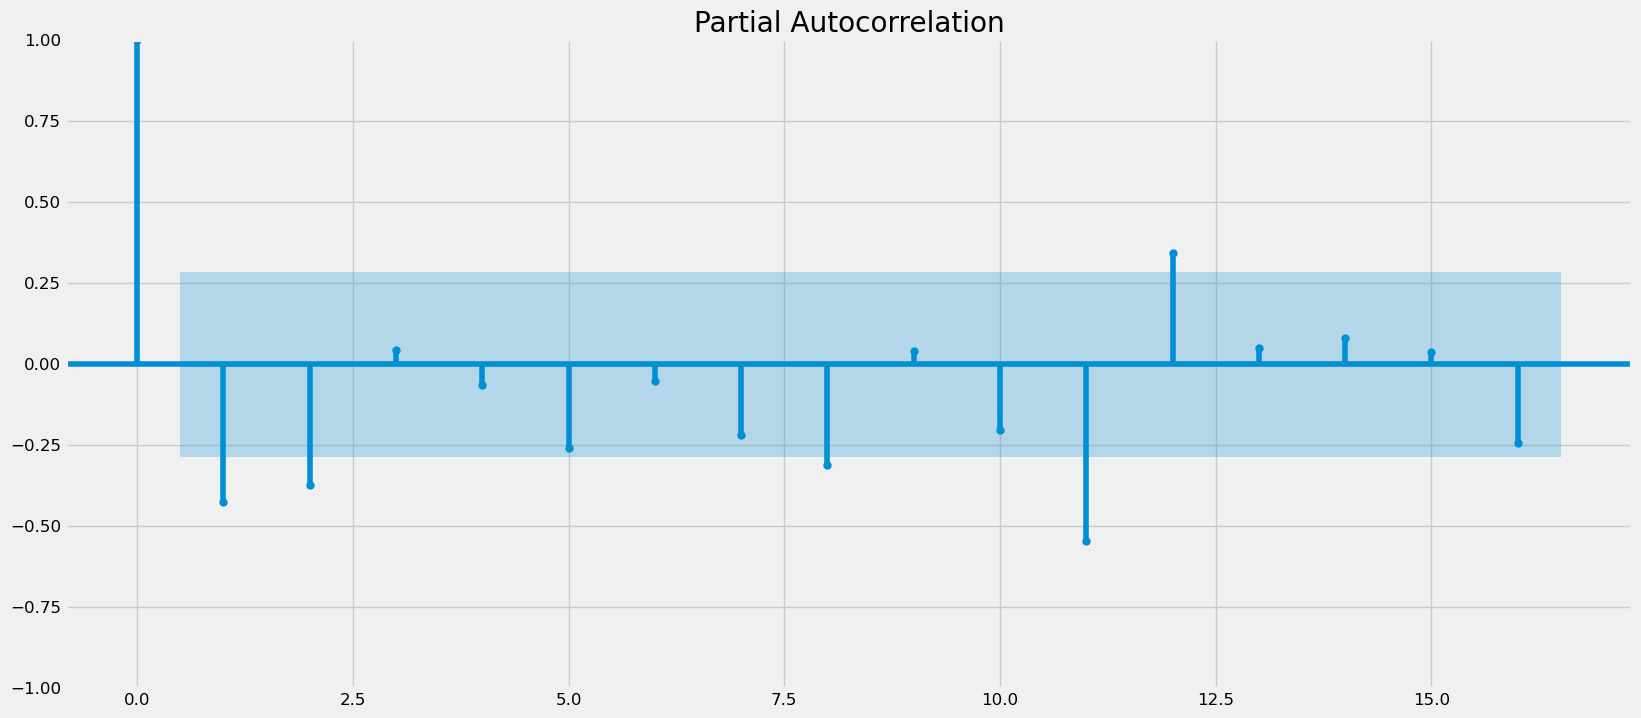

In [39]:
sm.graphics.tsa.plot_pacf(ydf['First difference'].iloc[1:],lags=16);

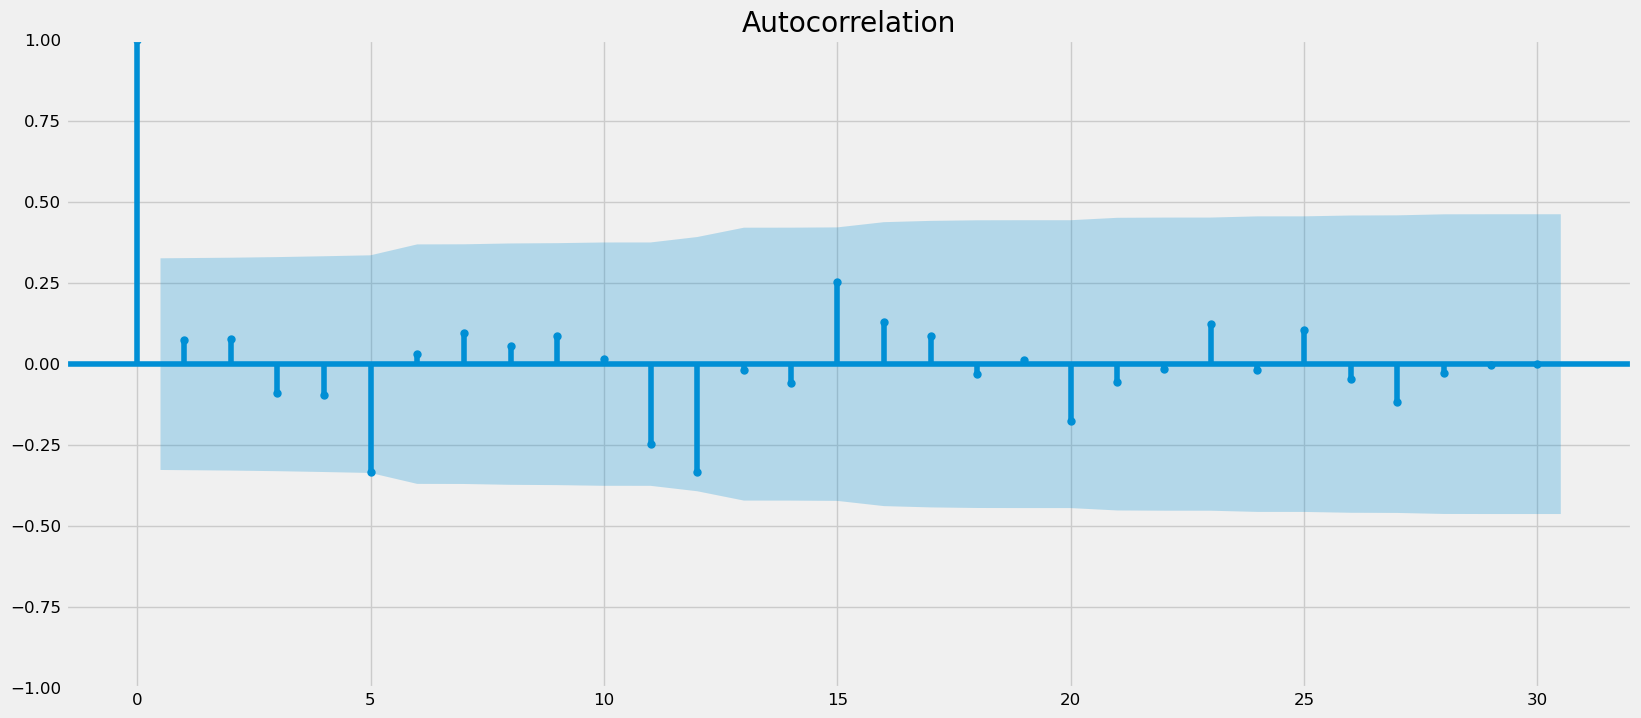

In [40]:
sm.graphics.tsa.plot_acf(ydf['First seasonal difference'].iloc[12:],lags=30);

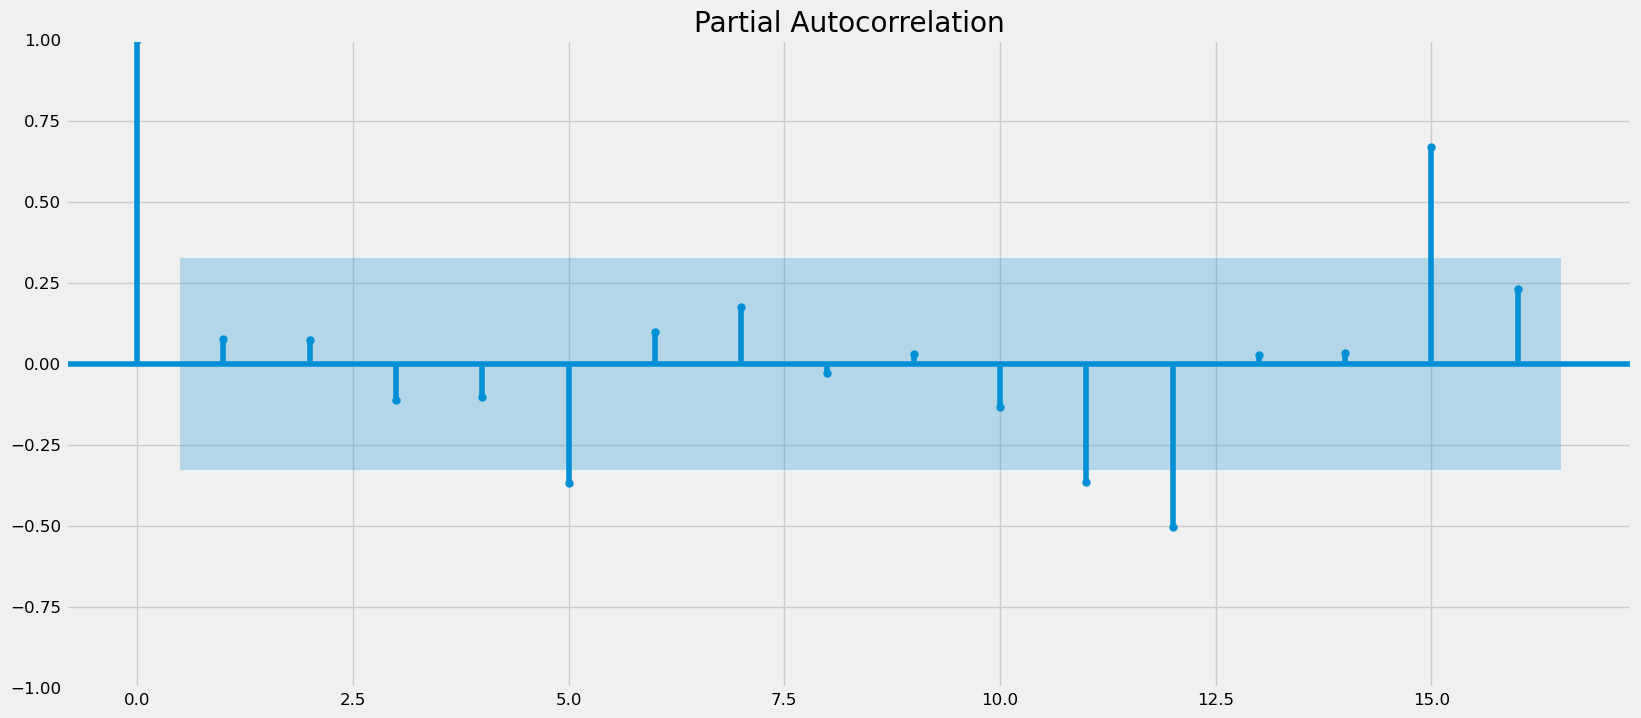

In [41]:
sm.graphics.tsa.plot_pacf(ydf['First seasonal difference'].iloc[12:],lags=16);

Obeservations:
    
1. From PACF plot, It looks like that using AR with lag 1 will be good for trend and AR with lag 0 for seasonality.
2. Similarly from ACF plot, it seems that MA with lag 1 will be good for trend and AR with lag 0 for seasonality.

## Implementing Sarimax

### Using grid search

Although we have an intution via differencing to use p=d=q=1 for Sarimax, Nonetheless lets try to use grid search to confirm or revise out initial guess.

In [42]:
#Generating Triplets
p = d = q = range(0, 2)

In [43]:
pdq = list(itertools.product(p, d, q))

In [44]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

Note: To prevent overfitting, lets start with simpler seasonal parameters.

In [45]:
seasonal_pdq=[(0,0,0,12),
              (0,1,0,12)]

### Train Test Split

In [49]:
train=y[:-8]
test=y[-8:]

In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:635.7727456105981
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:373.3962655674824
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:595.5320612374691
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:362.1546005275841
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:563.7391618684755
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:376.6474385556095
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:535.5541091101875
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:353.439093819732
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:577.3172822206351
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:375.165706625653
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2346775970751
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:364.04355619633554
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:558.5978427765548
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:371.1609992425301
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:536.1350558080653
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:355.26188117904917


#### We see that SARIMAX(1, 1, 1)x(0, 1, 0, 12) yields the lowest AIC value of 355.26.

### Initializing best parameters

In [51]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                 )
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.208      0.502      0.615      -0.303       0.511
ma.L1         -0.9098      0.195     -4.664      0.000      -1.292      -0.527
sigma2      6.541e+04   1.84e+04      3.558      0.000    2.94e+04    1.01e+05


## Checking Model Diagnostics

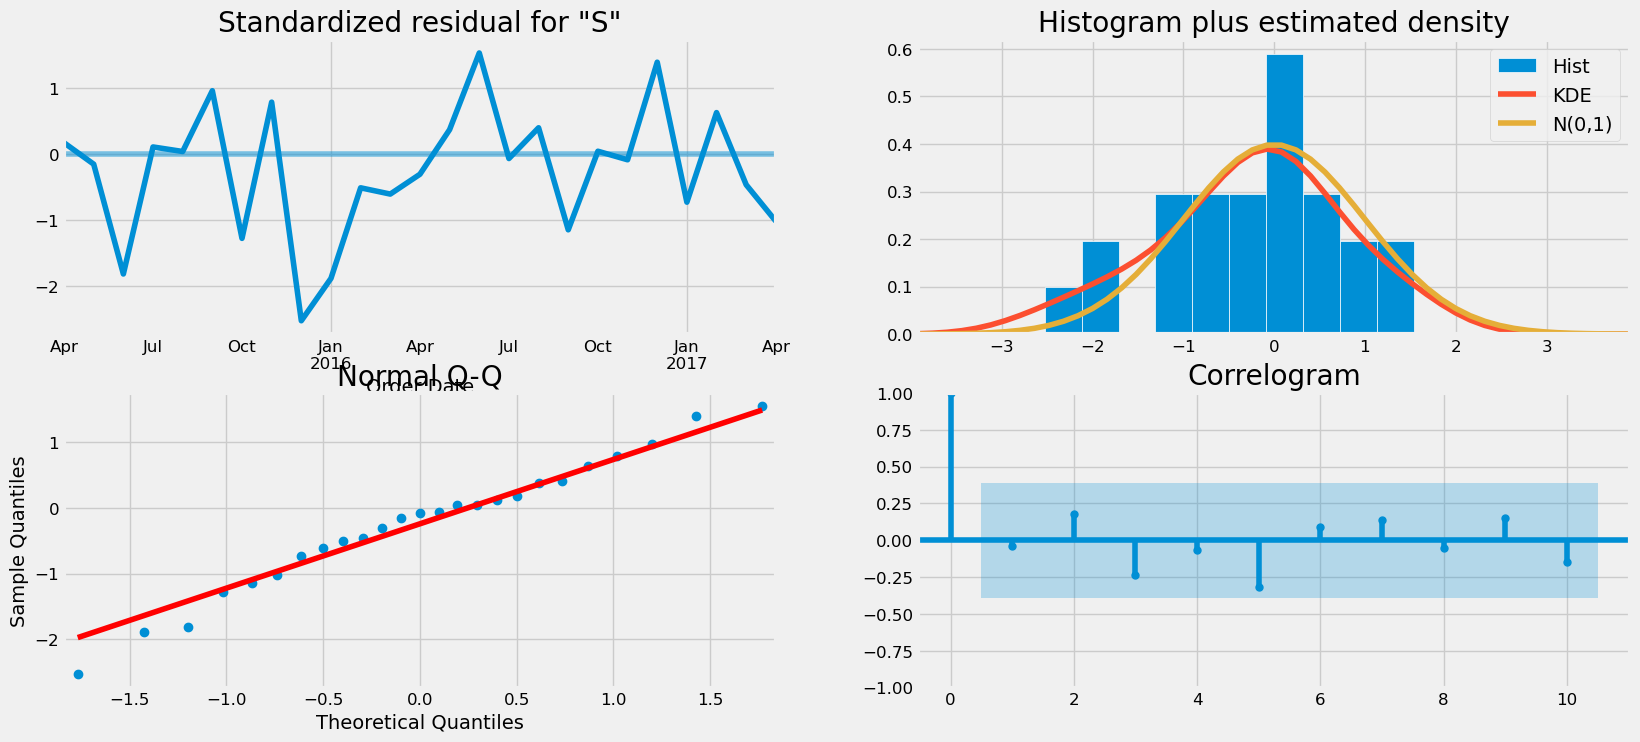

In [53]:
results.plot_diagnostics()
plt.show()

Observations:

1. Residuals of our model are uncorrelated and normally distributed with zero-mean.

- In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution.

- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

- The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

## Model Validation

In [55]:
pred=results.get_forecast(steps=8)
pred_ci=pred.conf_int()

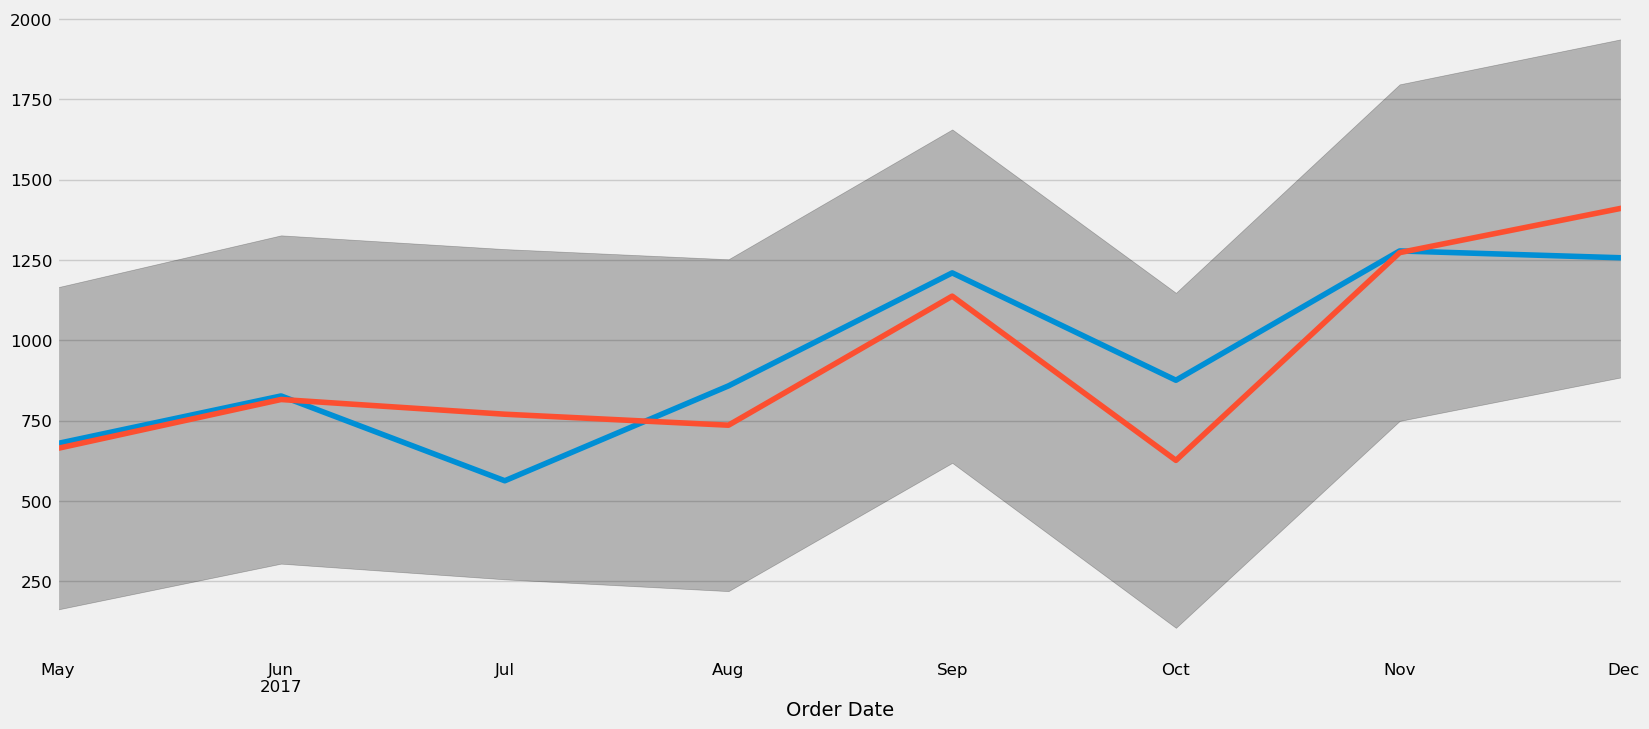

In [56]:
ax=test.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Predicted')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25);

Conclusion: We see that our results are well within the confidence interval.

## MSE and RMSE Calculation

In [81]:
test_forecast=pred.predicted_mean
mse_forecast=((test-test_forecast)**2).mean()
print('mse={}'.format(mse_forecast))

mse=18734.106900728515


In [59]:
print('rmse={}'.format(np.sqrt(mse_forecast)))

rmse=136.87259368013932


In [88]:
y.min(),y.max()

(356.8682727272727, 1532.2983250000002)

In a time series with fluctuations in between (356.8, 1532.2), rmse with a value of 136 seems to be good.

# Future forecasts

In [60]:
mod_final=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)

In [61]:
results_f=mod_final.fit()

In [62]:
pred_f=results_f.get_forecast(steps=50)

In [63]:
pred_f_ci=pred_f.conf_int()

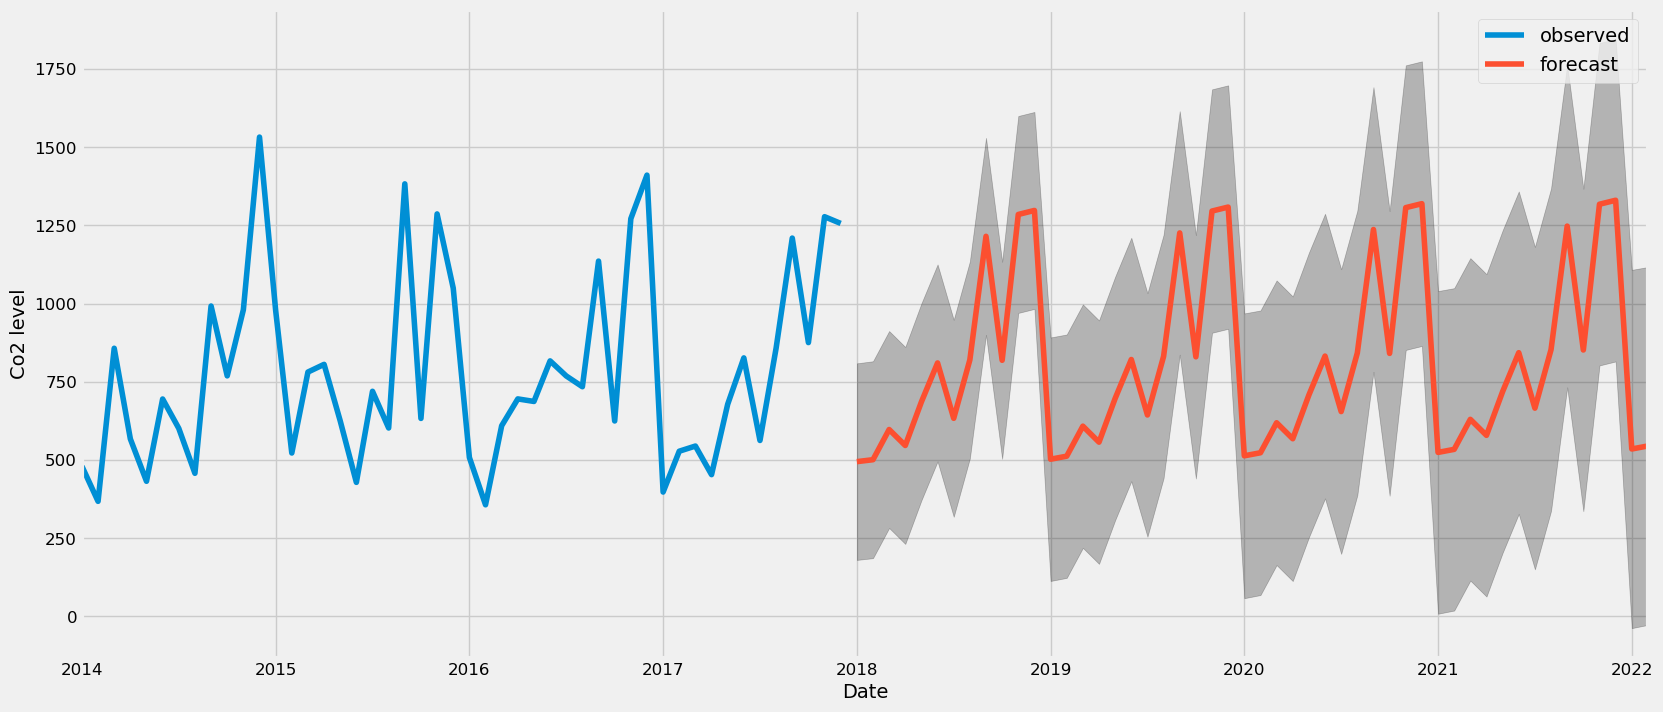

In [64]:
ax=y.plot(label='observed')
pred_f.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(pred_f_ci.index,pred_f_ci.iloc[:,0],pred_f_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Co2 level')
plt.legend()
plt.show();

In [82]:
y_f=pred_f.predicted_mean

In [84]:
type(y_f)

pandas.core.series.Series

In [86]:
y_f.to_csv('predictions.csv')